# CNN : Convlution Neural Network

### 합성곱 신경망
* Convolution Neural Network
* 합성곱 신경망
* 이미지 인식에 탁월한 효과
* 3가지 Layer
    * Convolution Layer
        * Feature 추출
        * ReLu 
    * Pooling Layer
        * Feature 중 중요한 것만 선택
    * Fully-Connected Layer
        * 최종 Feature들로 학습 및 예측
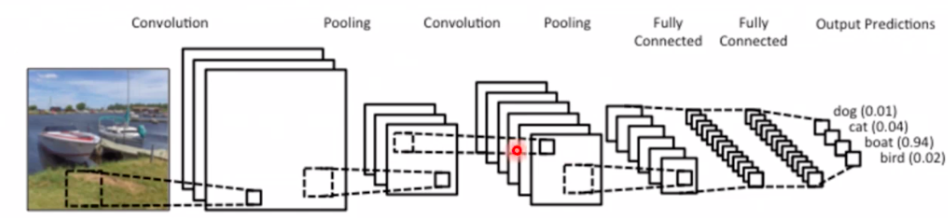


### 합성곱 연산
* 완전연결층은 입력값 모두에서 패턴을 찾기 때문에 입력값 모두가 변수고 가중치이다.
* Conv는 윈도우 크기(3x3)으로 나눠서 지역 패턴을 찾는다.
    * 학습된 패턴은 평행 이동 불편성을 갖는다
        * 고양이 눈이 화면 어디에 있든 중요하지 않다
        * 그냥 고양이 눈이다.
        * 만약 완전연결층이면 고양이 눈은 항상 거기 있어야 한다.
    * 패턴의 공간적 계층 구조를 학습할 수 있다
        * 단계를 여러번 두면 선이 면이 되고 면이 도형이 되서 점점 더 구체화
* Conv 층은 입력과 출력으로 특성맵(feature map)이라는 것을 사용
    * 3D 텐서 형식, (w, h, filter)
    * 최초 ConvD는 (w,h,c)인데 그 다음 부터는 필터를 지정한 대로 생성
    * 커널(윈도우)은 keras의 Conv2D(depth, (h, w))로 생성
        * (h, w)로 출력 크기가 결정, summary()로 확인

### 최대 풀링연산(MaxPool)
* 특성맵을 다운 샘플링하는 역할, 작게 만든다
    * 2x2크기의 윈도우로 걸쳐서 그 안에 있는 값 중 중 최대 값만 취한다.
    * 스트라이드는 보통 2
* 이걸 안하면?
    * 최종 층의 윈도우 영역은 최초 입력의 특정 영역에 대한 것만 반영
    * 파라미터가 너무 많아서 무조건 과대 적합
    * 어쨌든 크기를 줄이는게 목표
* 최대 풀링말고 평균값을 구하는 평균 풀링도 있다
    * 경험적 결과로 최대 풀링이 우수
    

* Demo : https://cs.stanford.edu/people/karpathy/convnetjs/demo/cifar10.html

### Convolution 연산과 필터
* 커널의 각 요소와 대응하는 입력 픽셀 값을 곱해서 모두 합한것
* kernel : 연산에 활용할 주변 픽셀 대상 선정
    * window, mask, filter 등의 이름으로 혼용
    * 커널 크기 : n x n
* 컨볼루션 연산으로 블러링, 샤프닝 등의 필터 적용
* CNN의 목표는 적절한 커널 학습
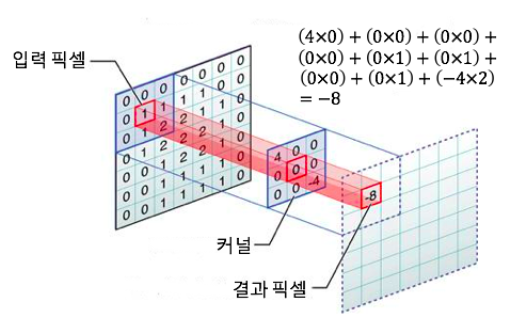

#### OpenCV를 이용한 Convolution 연산
* 평균 블러 필터

(444, 400, 3)


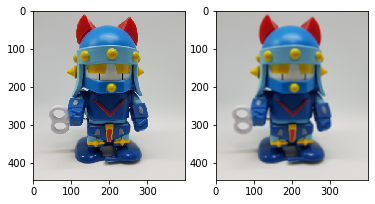

In [1]:
%matplotlib inline

import cv2
import numpy as np
import matplotlib.pylab as plt
img = cv2.imread('../../img/tkv.jpg')
print(img.shape)
'''
#5x5 평균 필터 커널 생성    ---①
kernel = np.array([[0.04, 0.04, 0.04, 0.04, 0.04],
                   [0.04, 0.04, 0.04, 0.04, 0.04],
                   [0.04, 0.04, 0.04, 0.04, 0.04],
                   [0.04, 0.04, 0.04, 0.04, 0.04],
                   [0.04, 0.04, 0.04, 0.04, 0.04]])
'''
# 5x5 평균 필터 커널 생성  ---②
kernel = np.ones((5,5))/5**2
# 필터 적용             ---③
blured = cv2.filter2D(img, -1, kernel)

# 결과 출력

plt.subplot(121)
plt.imshow(img[:,:,::-1])
plt.subplot(122)
plt.imshow(blured[:,:,::-1])


#### 엣지 검출 필터

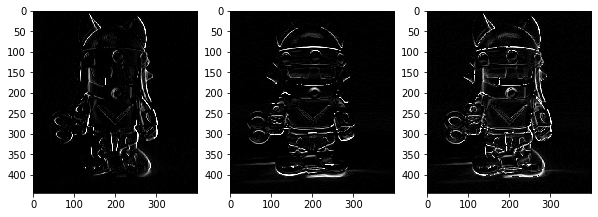

In [35]:
import cv2
import numpy as np
import matplotlib.pylab as plt
img = cv2.imread('../../img/tkv.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# 소벨 커널을 직접 생성해서 엣지 검출 ---①
## 소벨 커널 생성
gx_k = np.array([[-1,0,1],
                 [-2,0,2],
                 [-1,0,1]])

gy_k = np.array([[-1,-2,-1],
                 [0,0,0],
                 [1,2,1]])
## 소벨 필터 적용
edge_gx = cv2.filter2D(img, -1, gx_k)
edge_gy = cv2.filter2D(img, -1, gy_k)


# 결과 출력
plt.figure(figsize=(10,5))
plt.subplot(131)
plt.imshow(edge_gx, cmap='gray')
plt.subplot(132)
plt.imshow(edge_gy, cmap='gray')
plt.subplot(133)
plt.imshow(edge_gx + edge_gy, cmap='gray')
plt.show()

### 사물인식을 위한 8층 CNN
* Conv1 : convolution 계층에서 추출되는 정보, Edge와 Blob
* Conv3 : Texture -> Conv5 : 사물의 일부 -> FC: 사물의 클래스
* 깊은 Convolution Layer 
    * 복잡하고 추상화된 정보 추출
    * 뉴런이 반응하는 대상이 단순한 모양에서 고급 정보로 변화

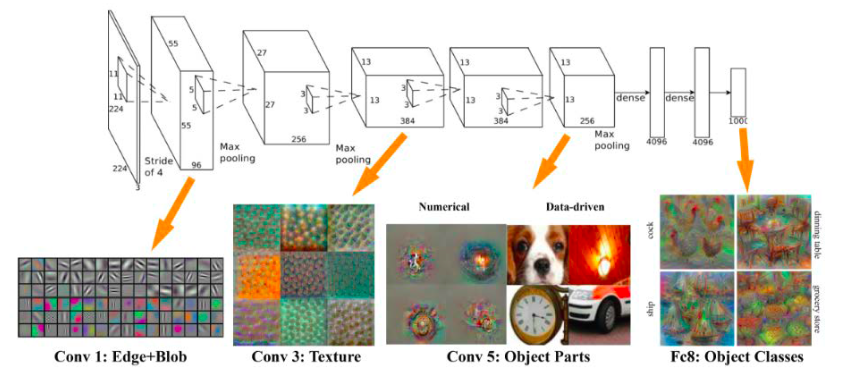

### 특징 추출
<video controls="controls" src="../../assets/Top_breeder.mp4" width=640 height=480></video>
* 출처 : https://www.youtube.com/watch?v=f1fXCRtSUWU

### 특징 추출2
<video controls="controls" src="../../assets/Avatar.mp4" width=640 height=480></video>
* 출처 :https://www.youtube.com/watch?v=U1KiC0AXhHg

## TF Convolution
* `tf.nn.conv2d(input,filter=None,strides=None,padding=None,...)`
    * input : `[batch, height, width, channel]`
    * filter : `[height, width, in_channel, out_channel]`
    * strides : 이동 간격, shape={1,2,4}, `[N, H, W, C]`
    * padding : `{"SMAE":출력이 입력의 크기와 같다, "VALID"}`


[[0 1 2]
 [3 4 5]
 [6 7 8]]


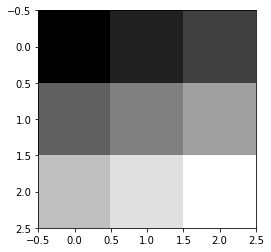

In [3]:
%matplotlib inline
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

img = np.arange(9).reshape(3,3)
print(img)
plt.imshow(img, cmap='gray')

(1, 3, 3, 1)
[[[[1.]]

  [[1.]]]


 [[[1.]]

  [[1.]]]]
tf.Tensor(
[[[[ 8.]
   [12.]]

  [[20.]
   [24.]]]], shape=(1, 2, 2, 1), dtype=float32)
[[ 8. 12.]
 [20. 24.]]


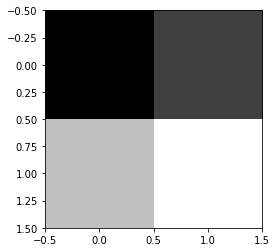

In [8]:
x = np.float32(img.reshape(1,3,3,1))
print(x.shape)
filter = np.ones((2,2,1,1), dtype=np.float32) # 2x2 window, 1:in, 1:out
print(filter)
filter = tf.constant(filter)
stride = [1,1,1,1]
conv2d = tf.nn.conv2d(x, filter, stride, padding='VALID')#SAME
print(conv2d)
out = conv2d.numpy().reshape(2,2)
print(out)
plt.imshow(out, cmap='gray')

### Conv2d를 이용한 평균 블러링

(1, 444, 400, 1)


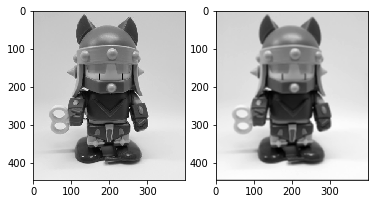

In [9]:
%matplotlib inline
import tensorflow as tf
import numpy as np
import matplotlib.pylab as plt
import cv2

img = cv2.imread('../../img/tkv.jpg', cv2.IMREAD_GRAYSCALE)

(h,w) = img.shape
x = img.reshape(1,h,w,1).astype(np.float32)

win_size = 5
filter = np.array([[0.04, 0.04, 0.04, 0.04, 0.04],
                   [0.04, 0.04, 0.04, 0.04, 0.04],
                   [0.04, 0.04, 0.04, 0.04, 0.04],
                   [0.04, 0.04, 0.04, 0.04, 0.04],
                   [0.04, 0.04, 0.04, 0.04, 0.04]])
filter = filter.reshape(5,5,1,1)
filter = np.ones((win_size,win_size,1,1))/win_size**2

conv2d = tf.nn.conv2d(x, filter, [1,1,1,1], padding='SAME')
blured = conv2d.numpy()
print(blured.shape)
blured = blured.reshape(h,w).astype(np.uint8)
# 결과 출력
plt.subplot(121)
plt.imshow(img, cmap='gray')
plt.subplot(122)
plt.imshow(blured, cmap='gray')


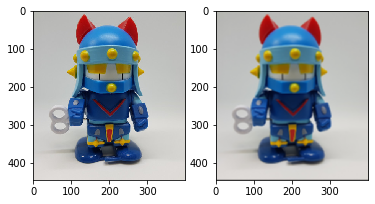

In [10]:
%matplotlib inline

import tensorflow as tf
import numpy as np
import matplotlib.pylab as plt
import cv2

img = cv2.imread('../../img/tkv.jpg')

(h,w,c) = img.shape
x = img.reshape(1,h,w,c).astype(np.float32)

win_size = 5
filter = np.zeros((win_size,win_size,c,c), dtype=np.float32)
filter[:,:] = np.eye(3) * (1/(win_size**2))

conv2d = tf.nn.conv2d(x, filter, [1,1,1,1], padding='SAME')
blured = conv2d.numpy()

#blured = blured.reshape(h,w,c).astype(np.uint8)
blured = np.squeeze(blured).astype(np.uint8)
# 결과 출력
plt.subplot(121)
plt.imshow(img[:,:,::-1])
plt.subplot(122)
plt.imshow(blured[:,:,::-1])


### Conv2d를 이용한 엣지 검출

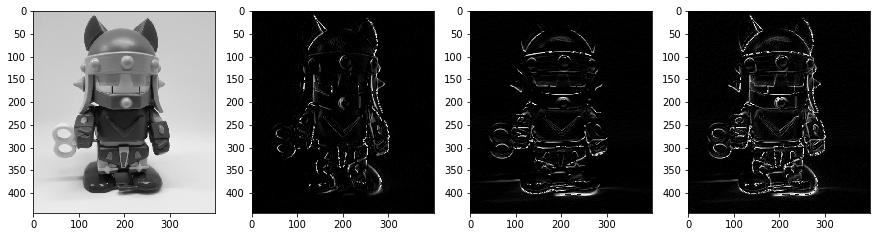

In [20]:
%matplotlib inline
import tensorflow as tf
import numpy as np
import matplotlib.pylab as plt
import cv2

img = cv2.imread('../../img/tkv.jpg', cv2.IMREAD_GRAYSCALE)

(h,w) = img.shape
x = img.reshape(1,h,w,1).astype(np.float32)

gx_k = np.array([[-1,0,1],
                 [-2,0,2],
                 [-1,0,1]])
gx_k = gx_k.reshape((3,3,1,1))

gy_k = np.array([[-1,-2,-1],
                 [0,0,0],
                 [1,2,1]])
gy_k = gy_k.reshape((3,3,1,1))

conv2d = tf.nn.conv2d(x, gx_k, [1,1,1,1], padding='SAME')
gx = conv2d.numpy()
gx[gx < 0 ] = 0  #음수 처리
gx = gx.reshape(h,w).astype(np.uint8)

conv2d = tf.nn.conv2d(x, gy_k, [1,1,1,1], padding='SAME')
gy = conv2d.numpy()
gy[gy < 0 ] = 0  #음수 처리
gy = gy.reshape(h,w).astype(np.uint8)

# 결과 출력
plt.figure(figsize=(15,5))
plt.subplot(141)
plt.imshow(img, cmap='gray')
plt.subplot(142)
plt.imshow(gx, cmap='gray')
plt.subplot(143)
plt.imshow(gy, cmap='gray')
plt.subplot(144)
plt.imshow(gx + gy, cmap='gray')


## TF Max Pool
* `tf.nn.max_pool(value, ksize, strides, padding...)`
    * value : input
    * ksize : window size, shape={1,2,4}, `[N, H, W, C]`
    * strides : 이동 간격, shape={1,2,4}, `[N, H, W, C]`
    * padding: `{"VALID", "SAME"}`

[[0. 1. 2.]
 [3. 4. 5.]
 [6. 7. 8.]]


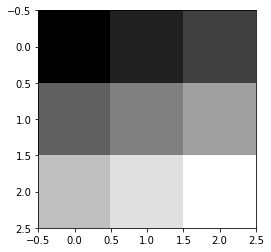

In [11]:
img = np.arange(9, dtype=np.float32).reshape(3,3)
print(img)
plt.imshow(img, cmap='gray')

[[[[4.]
   [5.]]

  [[7.]
   [8.]]]]


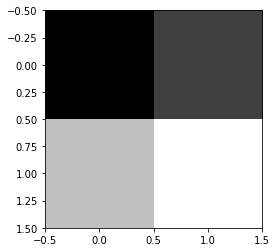

In [12]:
x = img.reshape(1,3,3,1)
pool = tf.nn.max_pool(x, ksize=[1,2,2,1], strides=[1,1,1,1], padding='VALID')
pooled = pool.numpy()
print(pooled)
plt.imshow(pooled.reshape(2,2), cmap='gray')

## MaxPool을 이용한 특징 검출

(1, 444, 400, 1)
(1, 44, 40, 1)


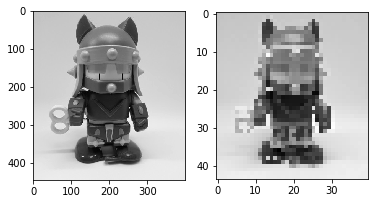

In [13]:
%matplotlib inline

import tensorflow as tf
import numpy as np
import matplotlib.pylab as plt
import cv2

img = cv2.imread('../../img/tkv.jpg', cv2.IMREAD_GRAYSCALE)
(h,w) = img.shape[:2]

x = np.float32(img.reshape(1,h,w,1))
print(x.shape)

pool = tf.nn.max_pool(x, ksize=[1,5,5,1], strides=[1,10,10,1], padding='VALID')
pooled = pool.numpy()
print(pooled.shape)
pooled = pooled.squeeze()

plt.subplot(121)
plt.imshow(img, cmap='gray')
plt.subplot(122)
plt.imshow(pooled, cmap='gray')

# MNIST Low-Level 구현


In [1]:
import tensorflow as tf
from tensorflow import keras
import numpy as np

n_input = (28,28,1)
n_L1 = 300
n_L2 = 100
n_output = 10

(X_train, y_train_label), (X_test, y_test_label) = keras.datasets.mnist.load_data()
X_train, X_test = X_train[..., np.newaxis], X_test[..., np.newaxis]

X_train = X_train.astype(np.float32)/255.0
X_test = X_test.astype(np.float32)/255.0
X_valid, X_train = X_train[:5000], X_train[5000:]

y_valid_label, y_train_label = y_train_label[:5000], y_train_label[5000:]
y_train = np.eye(n_output)[y_train_label]
y_valid = np.eye(n_output)[y_valid_label]
y_test = np.eye(n_output)[y_test_label]


batch_size = 100
train_ds = tf.data.Dataset.from_tensor_slices((X_train, y_train)).shuffle(10000).batch(batch_size)

initializer =  tf.initializers.GlorotUniform() #xavier
W1 = tf.Variable(initializer([3, 3, 1, 32]))
W2 = tf.Variable(initializer([3, 3, 32, 64]))
W3 = tf.Variable(initializer([7 * 7 * 64, 256]))
W4 = tf.Variable(initializer([256, 10]))

def model(X, training=False):
    L1 = tf.nn.conv2d(X, W1, strides=[1, 1, 1, 1], padding='SAME')
    L1 = tf.nn.relu(L1)
    L1 = tf.nn.max_pool(L1, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='SAME')
    L2 = tf.nn.conv2d(L1, W2, strides=[1, 1, 1, 1], padding='SAME')
    L2 = tf.nn.relu(L2)
    L2 = tf.nn.max_pool(L2, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='SAME')    
    L3 = tf.reshape(L2, [-1, 7 * 7 * 64])
    L3 = tf.matmul(L3, W3)
    L3 = tf.nn.relu(L3)
    if training:
        L3 = tf.nn.dropout(L3, 0.5)
    hyperthesis = tf.matmul(L3, W4)
    return hyperthesis

n_epochs = 10
step = 0

learning_rate = 0.0001
optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate)

for epoch in range(n_epochs):
    for X_batch, y_batch in train_ds:
        with tf.GradientTape() as tape:
            predict = model(X_batch, training=True)
            cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(labels=y_batch, logits=predict))
        grads = tape.gradient(cost, [W1, W2, W3, W4])
        optimizer.apply_gradients(grads_and_vars=zip(grads, [W1, W2, W3, W4]))
    
        is_correct = tf.equal(tf.argmax(predict, axis=1), tf.argmax(y_batch, axis=1))
        acc_train = tf.reduce_mean(tf.cast(is_correct, tf.float32))                              
    
    predict = model(X_valid, training=True)
    is_correct = tf.equal(tf.argmax(predict, axis=1), tf.argmax(y_valid, axis=1))
    acc_val = tf.reduce_mean(tf.cast(is_correct, tf.float32))
    print(f"epoch:{epoch}, cost:{cost}, train accuracy:{acc_train}, validation accuracy:{acc_val}")

predict = model(X_test)
is_correct = tf.equal(tf.argmax(predict, axis=1), tf.argmax(y_test, axis=1))
acc_test = tf.reduce_mean(tf.cast(is_correct, tf.float32))
print("Test Accuracy:{}".format(acc_test))

epoch:0, cost:0.1876388043165207, train accuracy:0.9200000166893005, validation accuracy:0.9350000023841858
epoch:1, cost:0.098778136074543, train accuracy:0.9800000190734863, validation accuracy:0.9610000252723694
epoch:2, cost:0.02801564708352089, train accuracy:1.0, validation accuracy:0.9666000008583069
epoch:3, cost:0.1163267120718956, train accuracy:0.9599999785423279, validation accuracy:0.9739999771118164
epoch:4, cost:0.0640215277671814, train accuracy:0.9800000190734863, validation accuracy:0.9768000245094299
epoch:5, cost:0.19891682267189026, train accuracy:0.9800000190734863, validation accuracy:0.9789999723434448
epoch:6, cost:0.043581247329711914, train accuracy:0.9900000095367432, validation accuracy:0.9793999791145325
epoch:7, cost:0.018278280273079872, train accuracy:1.0, validation accuracy:0.9829999804496765
epoch:8, cost:0.04990836977958679, train accuracy:0.9700000286102295, validation accuracy:0.9846000075340271
epoch:9, cost:0.060384660959243774, train accuracy:0

## MNIST, Keras API

In [12]:
import tensorflow as tf
from tensorflow import keras
import numpy as np

n_input = 28*28
n_L1 = 300
n_L2 = 100
n_output = 10

(X_train, y_train), (X_test, y_test) = keras.datasets.mnist.load_data()
X_train = X_train/255.0
X_test = X_test/255.0
X_train = X_train[..., tf.newaxis]
X_test = X_test[..., tf.newaxis]

X_valid, X_train = X_train[:5000], X_train[5000:]
y_valid, y_train = y_train[:5000], y_train[5000:]

model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32,3, activation='relu'),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation=tf.nn.relu ), #, input_shape=(n_input,)),  # 입력의 형태가 필요합니다.
    tf.keras.layers.Dense(n_output, activation=tf.nn.softmax)
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(X_train, y_train, epochs=10, batch_size=100, validation_data=(X_valid, y_valid))

test_loss, test_acc = model.evaluate(X_test, y_test, verbose=0)

print("Test Accuracy:{}".format(test_acc))

Train on 55000 samples, validate on 5000 samples
Epoch 1/10
55000/55000 [==============================] - 5s 83us/sample - loss: 0.1726 - accuracy: 0.9488 - val_loss: 0.0826 - val_accuracy: 0.9772
Epoch 2/10
55000/55000 [==============================] - 4s 73us/sample - loss: 0.0514 - accuracy: 0.9843 - val_loss: 0.0602 - val_accuracy: 0.9828
Epoch 3/10
55000/55000 [==============================] - 4s 73us/sample - loss: 0.0271 - accuracy: 0.9919 - val_loss: 0.0580 - val_accuracy: 0.9840
Epoch 4/10
55000/55000 [==============================] - 4s 73us/sample - loss: 0.0173 - accuracy: 0.9949 - val_loss: 0.0575 - val_accuracy: 0.9846
Epoch 5/10
55000/55000 [==============================] - 4s 73us/sample - loss: 0.0102 - accuracy: 0.9970 - val_loss: 0.0617 - val_accuracy: 0.9846
Epoch 6/10
55000/55000 [==============================] - 4s 73us/sample - loss: 0.0073 - accuracy: 0.9978 - val_loss: 0.0702 - val_accuracy: 0.9842
Epoch 7/10
55000/55000 [==============================] -

## 잘 알려진 CNNs
* LeNet
* AlexNet
* GoogLeNet(Inception V1)
* SqueezNet
* VGGNet(VGG16 & VGG19)
* ResNet50
* Inception V3
* Xception
* MobileNet

#### Neural Network Visualization
* TensorSpace
    * https://tensorspace.org/index.html

### LeNet
* LeCun (얀 르쿤) 1998
* 최초의 CNN
* 손글씨 숫자 인식를 목표로 생성
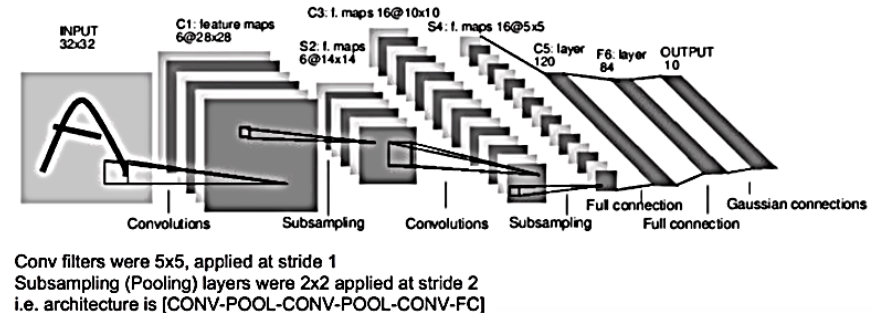


### LeNet-5 구성
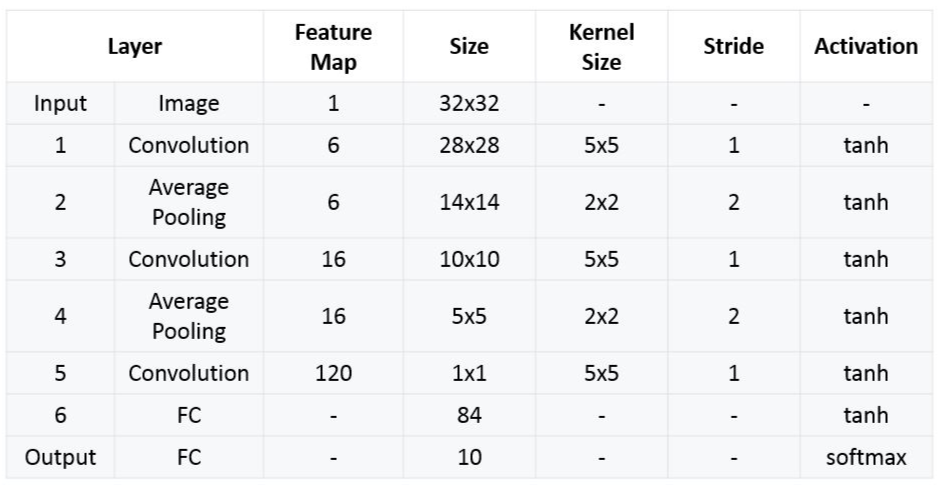

## LeNet CNN 생성 실습

### Hot dog VS Not hot dog
* https://www.youtube.com/watch?v=pqTntG1RXSY


In [33]:
%%html
<iframe width="786" height="442" src="https://www.youtube.com/embed/pqTntG1RXSY" frameborder="0" allow="accelerometer; autoplay; encrypted-media; gyroscope; picture-in-picture" allowfullscreen></iframe>

### 1. Collecting Image Set - Hot dog
1. Open the Chrome and visit Google
2. Search "hog dog"
3. Scroll down until no hot dog image comes out
4. open developer console
5. add jQuery
```javascript
var script = document.createElement('script');
script.src = "https://ajax.googleapis.com/ajax/libs/jquery/2.2.0/jquery.min.js";
document.getElementsByTagName('head')[0].appendChild(script);
```
6. Grap the URLs
```javascript
var urls = $('.rg_di .rg_meta').map(function() { return JSON.parse($(this).text()).ou; });
```

7. Download the URLs as a file
```javascript
var textToSave = urls.toArray().join('\n');
var hiddenElement = document.createElement('a');
hiddenElement.href = 'data:attachment/text,' + encodeURI(textToSave);
hiddenElement.target = '_blank';
hiddenElement.download = 'urls.txt';
hiddenElement.click();
```

##### Python으로 이미지 다운로드

In [4]:
!pip install requests

In [ ]:
import requests
import cv2
import os

img_path = '../../img/hotdog/'
file = open('../../urls.txt')
urls = file.read()
urls = urls.strip().split('\n')
tot = 0

# loop the URLs
for url in urls:
    try:
        print(url)
        # try to download the image
        r = requests.get(url, timeout=60)

        # save the image to disk
        p = os.path.sep.join([img_path, "{}.jpg".format(
            str(tot).zfill(8))])
        f = open(p, "wb")
        f.write(r.content)
        f.close()

        # update the counter
        print("[INFO] downloaded: {}".format(p))
        tot += 1

        # handle if any exceptions are thrown during the download process
    except Exception as e:
        print("[INFO] error downloading {}...skipping".format(e))

##### 이미지 로딩 체크
로딩할 수 없는 이미지는 지운다.

In [ ]:
import glob

paths = glob.glob(img_path + "/*.*")

# loop over the image paths we just downloaded
for imagePath in paths:
    # initialize if the image should be deleted or not
    delete = False

    # try to load the image
    try:
        image = cv2.imread(imagePath)

        # if the image is `None` then we could not properly load it
        # from disk, so delete it
        if image is None:
            delete = True

    # if OpenCV cannot load the image then the image is likely
    # corrupt so we should delete it
    except:
        print("Except")
        delete = True

    # check to see if the image should be deleted
    if delete:
        print("[INFO] deleting {}".format(imagePath))
        os.remove(imagePath)

## 2. Model 생성 및 Trainging

### LeNet Model 생성
* Activation 함수를 tanh 대신 relu 사용

In [50]:
import tensorflow as tf

def make_LeNet(width, height, depth, classes):
    inputShape = (height, width, depth)
    
    model = tf.keras.models.Sequential()

    model.add(tf.keras.layers.Conv2D(6, (5, 5), padding="same", input_shape=inputShape))
    model.add(tf.keras.layers.Activation("relu"))
    model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))

    model.add(Conv2D(16, (5, 5), padding="same"))
    model.add(Activation("relu"))
    model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))

    model.add(Conv2D(120, (5, 5), padding="same"))
    model.add(Activation("relu"))

    model.add(Flatten())
    model.add(Dense(84))
    model.add(Activation("relu"))

    model.add(Dense(classes))
    model.add(Activation("softmax"))

    return model

### LeNet Model 훈련

[INFO] loading images...
[INFO] compiling model...
[INFO] training network...
Epoch 1/25
21/21 [==============================] - 1s 38ms/step - loss: 0.7310 - accuracy: 0.5158 - val_loss: 0.6656 - val_accuracy: 0.5193
Epoch 2/25
21/21 [==============================] - 1s 41ms/step - loss: 0.6491 - accuracy: 0.5714 - val_loss: 0.5828 - val_accuracy: 0.7897
Epoch 3/25
21/21 [==============================] - 1s 39ms/step - loss: 0.5783 - accuracy: 0.6782 - val_loss: 0.5664 - val_accuracy: 0.6738
Epoch 4/25
21/21 [==============================] - 1s 37ms/step - loss: 0.4552 - accuracy: 0.7835 - val_loss: 0.3957 - val_accuracy: 0.8369
Epoch 5/25
21/21 [==============================] - 1s 37ms/step - loss: 0.3183 - accuracy: 0.8767 - val_loss: 0.2877 - val_accuracy: 0.8884
Epoch 6/25
21/21 [==============================] - 1s 39ms/step - loss: 0.2543 - accuracy: 0.8947 - val_loss: 0.2441 - val_accuracy: 0.9013
Epoch 7/25
21/21 [==============================] - 1s 41ms/step - loss: 0.2

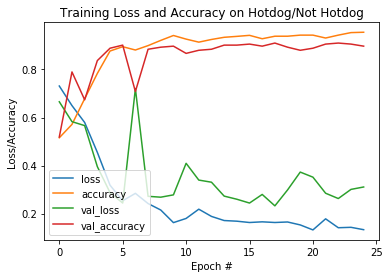

In [56]:
%matplotlib inline

import matplotlib
#matplotlib.use("Agg")

from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.utils import to_categorical

import matplotlib.pyplot as plt
import numpy as np
import random
import cv2
import os
import glob

EPOCHS = 25
INIT_LR = 1e-3
BS = 32

# initialize the data and labels
print("[INFO] loading images...")
data = []
labels = []

model_path = "./train_models/hotdog.h5"
dataset_path = '../../img/'
paths = glob.glob(dataset_path + "/**/*.*")

# grab the image paths and randomly shuffle them
imagePaths = sorted(paths)
random.seed(42)
random.shuffle(imagePaths)

# loop over the input images
for imagePath in imagePaths:
    # load the image, pre-process it, and store it in the data list
    image = cv2.imread(imagePath)
    image = cv2.resize(image, (28, 28))
   #image = img_to_array(image)
    data.append(image)

    label = imagePath.split(os.path.sep)[-2]
    label = 1 if label == "hotdog" else 0
    labels.append(label)

data = np.array(data, dtype="float") / 255.0
labels = np.array(labels)

(trainX, testX, trainY, testY) = train_test_split(data, labels, test_size=0.25, random_state=42)

trainY = to_categorical(trainY, num_classes=2)
testY = to_categorical(testY, num_classes=2)

# construct the image generator for data augmentation
aug = ImageDataGenerator(rotation_range=30, width_shift_range=0.1,
                        height_shift_range=0.1, shear_range=0.2, zoom_range=0.2,
                        horizontal_flip=True, fill_mode="nearest")

print("[INFO] compiling model...")
model = make_LeNet(width=28, height=28, depth=3, classes=2)
opt = Adam(lr=INIT_LR, decay=INIT_LR / EPOCHS)
model.compile(loss="binary_crossentropy", optimizer=opt, metrics=["accuracy"])

print("[INFO] training network...")
hist = model.fit_generator(aug.flow(trainX, trainY, batch_size=BS),
                validation_data=(testX, testY), steps_per_epoch=len(trainX) // BS,
                epochs=EPOCHS, verbose=1)

print("[INFO] serializing network...")
model.save(model_path)


for key in hist.history.keys():
    plt.plot(np.arange(0, EPOCHS), hist.history[key], label=key)
plt.title("Training Loss and Accuracy on Hotdog/Not Hotdog")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend(loc="lower left")


### Hotdog/Not Hotdog Prediction Test

In [7]:
!pip install imutils

['../../examples\\bicycle.jpg', '../../examples\\car.jpg', '../../examples\\hotdog1.jpg', '../../examples\\hotdog2.jpg', '../../examples\\manhattan.png', '../../examples\\night_sky.png', '../../examples\\shue.jpg']
[INFO] loading network...


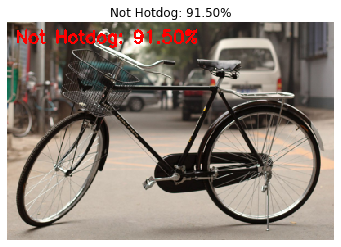

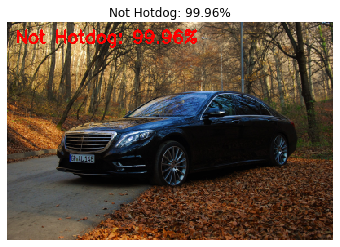

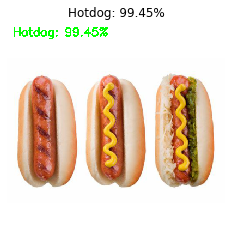

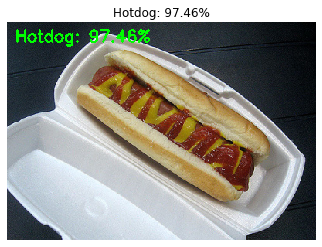

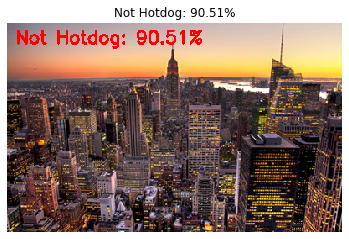

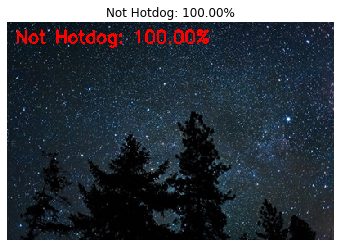

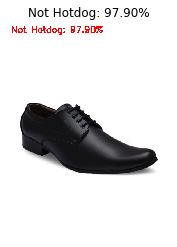

In [57]:
%matplotlib inline

from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.models import load_model
import numpy as np
import argparse
import cv2
import glob
import matplotlib.pyplot as plt
import imutils

test_set_path = '../../examples/*.*'
model_path = "./train_models/hotdog.h5"
test_imgs = glob.glob(test_set_path)
print(test_imgs)


print("[INFO] loading network...")
model = load_model(model_path)

for img in test_imgs:
    image = cv2.imread(img)
    orig = image.copy()

    image = cv2.resize(image, (28, 28))
    image = image.astype("float") / 255.0
    #image = img_to_array(image)
    image = np.expand_dims(image, axis=0)


    # classify the input image
    (notHotdog, hotdog) = model.predict(image)[0]

    # build the label
    if hotdog > notHotdog:
        label = "Hotdog"
        proba = hotdog 
        color = (0,255,0)
    else: 
        label = "Not Hotdog"
        proba =  notHotdog
        color = (0,0,255)

    label = "{}: {:.2f}%".format(label, proba * 100)
    # draw the label on the image
    output = imutils.resize(orig, width=400)
    cv2.putText(output, label, (10, 25),  cv2.FONT_HERSHEY_SIMPLEX,
        0.7, color, 2)

    plt.imshow(output[:,:,::-1])
    plt.title(label)
    plt.axis('off')
    plt.show()

## 그 밖에 잘 알려진 CNNs

### AlexNet
* 2012 이미지넷 대회 우승
* 알렉스 크리체프스키(Alex Krizhevsky)
* 제프리 힌튼 교수 팀
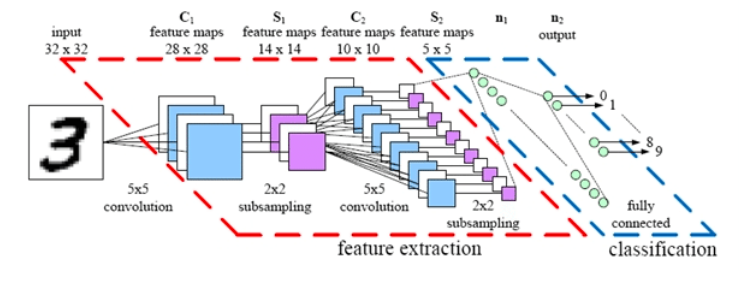

### AlexNet 구성
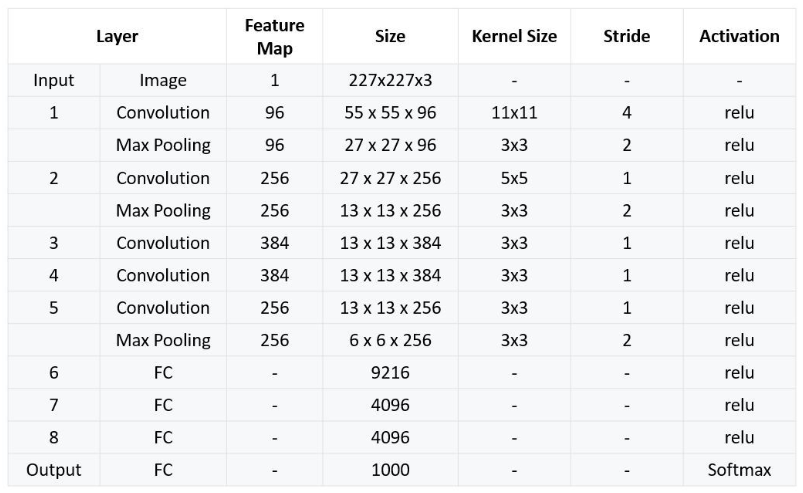

### GoogLeNet
* 구글 리서치, 크리스찬 세게디(Christian Szegedy)
* ILSVRC 2014 대회 우승
    * Top-5 Error 6.7%
* Inception Module
    * 서브 네트워크
    * 더 깊은  CNN
    * 더 효과적인 파라미터 사용
        * 사이즈가 다른 여러 필터를 연결
        * 더 깊지만 전체 파라미터 갯수는 VGG16/VGG19 보다 더 적음
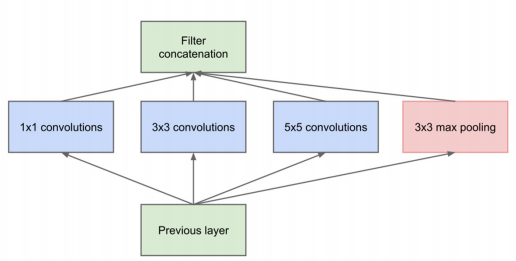
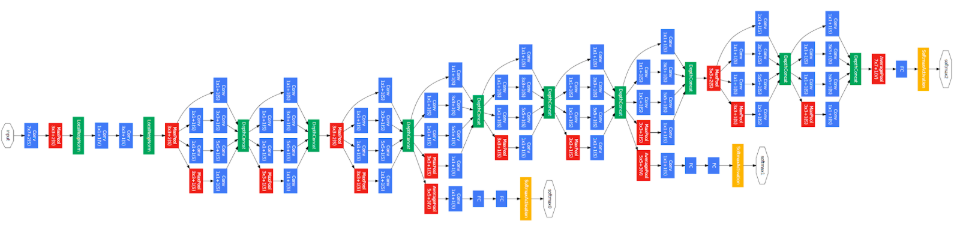

### GoogLeNet 구성
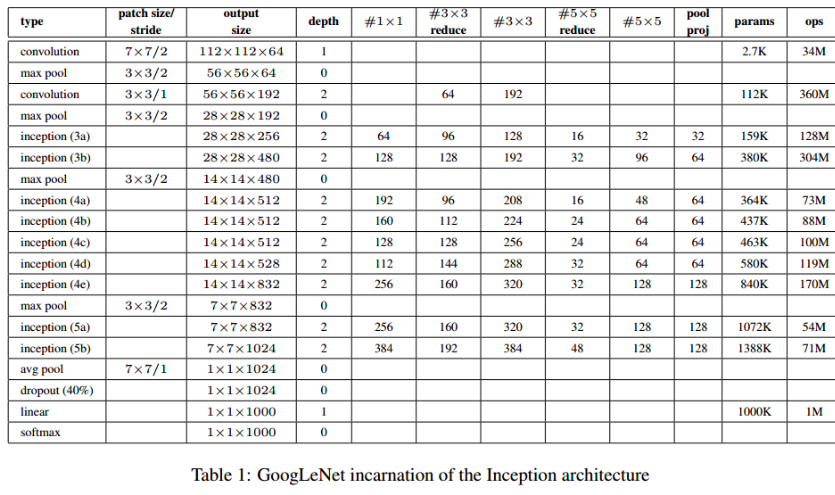

### SqueezeNet
* CNN 모델은 점점 깊어지는 추세
    * 모델의 크기가 커지고 파라미터 갯수가 많아진다.
    * 고성능 컴퓨팅 파워 필요
    * 저성능 컴퓨터에서는 훈련은 물론 예측도 불가능
* Landola(2016)의 논문에 의해 제안
    * AlexNet과 비슷한 정확도
    * 50배 적은 파라미터
    * 0.5mB 이하의 모델 크기를 자랑
    * Raspberry Pi 에서도 사용 가능
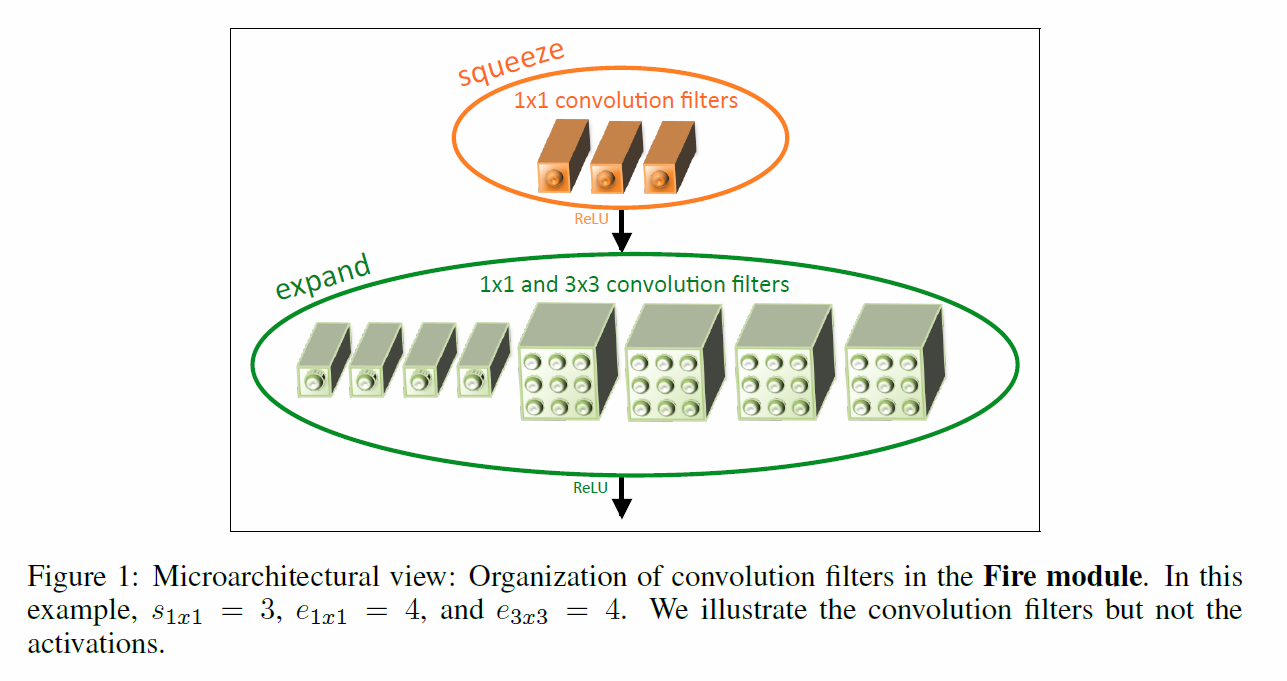

### VGGNet
* Simonyan, Zisserman 2014 "Very Deep Convolution Networks for Large Scale Image Recognition"
    * https://arxiv.org/abs/1409.1556
* 3x3 컨볼루션 레이어만 사용하는 것으로 유명
* VGG16(16Layers), VGG19(19Layers)
* 깊이 때문에 매우 느리다.

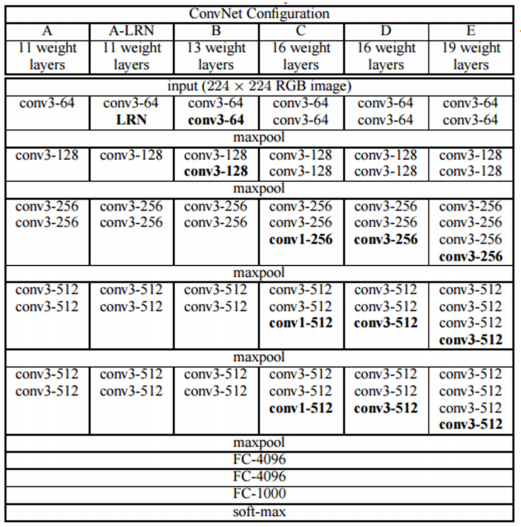

### Inception V3
* GoogLeNet의 Inception V1의 개선
* Inception V2, V3
* 초기 모델에서 개선된 진화
* 효과적인 컨볼루션 필터(7x7 필터)
* 향상된 표준화, 컨볼루션의 factorization


### MobileNet
* 무거운 Convolution Layer을 Fatorization으로 줄이다.
* Depthwise Separable Convlution
    * DepthWise와 PointWise를 분리
    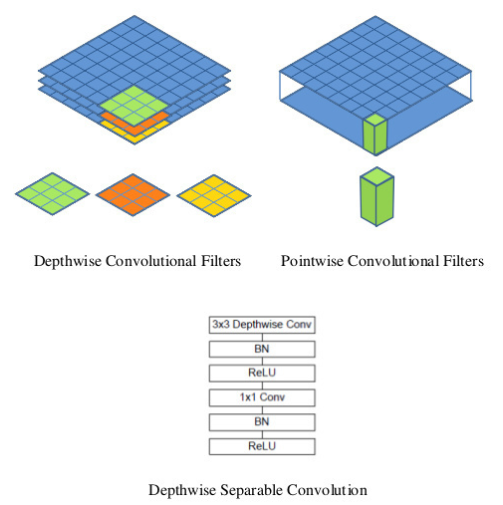
    * 계산량을  8~9배 줄이다.
    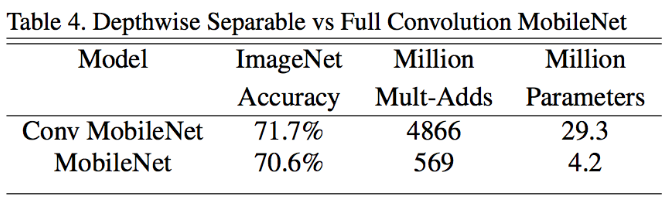

## Keras Image Classification Pre-trained Models on ImageNet 
* Xception
* VGG16
* VGG19
* ResNet, ResNetV2, ResNeXt
* InceptionV3
* InceptionResNetV2
* MobileNet
* MobileNetV2
* DenseNet
* NASNet

### API
* [`keras.applications`](https://keras.io/applications/)
    * download : `~/.keras/model/`

### Pre Trained Model
* ResNet50 Example
* `model = ResNet50(weights='imagenet')`
    * `model.predict(x)`

Predicted: [('n02504458', 'African_elephant', 0.62805945), ('n02504013', 'Indian_elephant', 0.257143), ('n01871265', 'tusker', 0.11093565)]


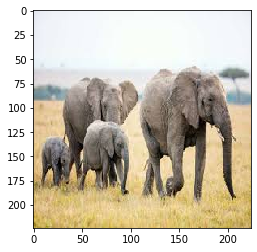

In [29]:
%matplotlib inline

from tensorflow.keras.applications import ResNet50
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.resnet50 import preprocess_input, decode_predictions
import numpy as np
import matplotlib.pyplot as plt

model = ResNet50(weights='imagenet')

img_path = '../../img/elephant.jpg'
img = image.load_img(img_path, target_size=(224, 224))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)

preds = model.predict(x)
print('Predicted:', decode_predictions(preds, top=3)[0])

plt.imshow(img)

## Transfer Learning 
* Pretrained Model 재사용하기

In [33]:
# tfds 사용을 위한 추가 설치
!pip install tensorflow-datasets

You should consider upgrading via the 'python -m pip install --upgrade pip' command.


In [18]:
import tensorflow_datasets as tfds
tfds.disable_progress_bar()

SPLIT_WEIGHTS = (8, 1, 1)
splits = tfds.Split.TRAIN.subsplit(weighted=SPLIT_WEIGHTS)

(raw_train, raw_validation, raw_test), metadata = tfds.load(
    'cats_vs_dogs', split=list(splits),
    with_info=True, as_supervised=True)

In [35]:
print(raw_train)
print(raw_validation)
print(raw_test)

<_OptionsDataset shapes: ((None, None, 3), ()), types: (tf.uint8, tf.int64)>
<_OptionsDataset shapes: ((None, None, 3), ()), types: (tf.uint8, tf.int64)>
<_OptionsDataset shapes: ((None, None, 3), ()), types: (tf.uint8, tf.int64)>


### label , 0: cat, 1:dog

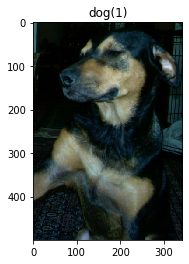

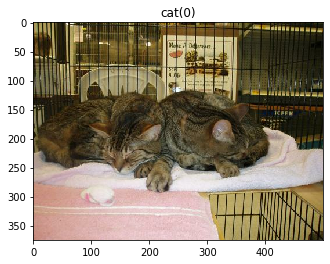

In [19]:
get_label_name = metadata.features['label'].int2str

for image, label in raw_train.take(2):
  plt.figure()
  plt.imshow(image)
  plt.title(f"{get_label_name(label)}({label})")

In [20]:
IMG_SIZE = 160 # All images will be resized to 160x160

def format_example(image, label):
  image = tf.cast(image, tf.float32)
  image = (image/127.5) - 1
  image = tf.image.resize(image, (IMG_SIZE, IMG_SIZE))
  return image, label

In [21]:
train = raw_train.map(format_example)
validation = raw_validation.map(format_example)
test = raw_test.map(format_example)

W1103 21:46:44.952688  7376 image.py:693] Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
W1103 21:46:44.968673  7376 image.py:693] Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


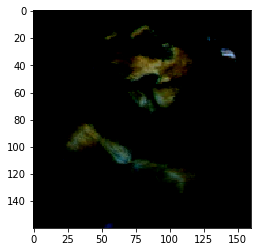

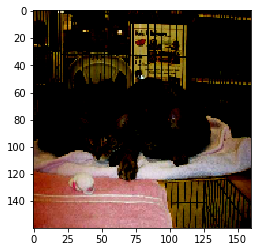

In [22]:
for image, label in train.take(2):
  plt.figure()
  plt.imshow(image)

In [23]:
BATCH_SIZE = 32
SHUFFLE_BUFFER_SIZE = 1000
train_batches = train.shuffle(SHUFFLE_BUFFER_SIZE).batch(BATCH_SIZE)
validation_batches = validation.batch(BATCH_SIZE)
test_batches = test.batch(BATCH_SIZE)

In [24]:
for image_batch, label_batch in train_batches.take(1):
   pass

image_batch.shape

TensorShape([32, 160, 160, 3])

### Pre-trained MobileNet
* `tf.keras.applications.MobileNetV2()`
    * `input_shape` : (224,224,3)
    * `include_top` : 최상위 fully-connected layer(Classfification layers) 추가 여부
        * Transfer-learing에는 False 지정 필요
    * `weights` : weight 초기 로딩 방법
        * 'imagenet' : ImageNet으로 pre-train 된 weights로 초기화
        * file_path : 로딩할 weight 파일 경로
        * None : random initializtion

In [25]:
IMG_SHAPE = (IMG_SIZE, IMG_SIZE, 3)

# Create the base model from the pre-trained model MobileNet V2
base_model = tf.keras.applications.MobileNetV2(input_shape=IMG_SHAPE,
                                               include_top=False,
                                               weights='imagenet')
base_model.summary()

Model: "mobilenetv2_1.00_160"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_7 (InputLayer)            [(None, 160, 160, 3) 0                                            
__________________________________________________________________________________________________
Conv1_pad (ZeroPadding2D)       (None, 161, 161, 3)  0           input_7[0][0]                    
__________________________________________________________________________________________________
Conv1 (Conv2D)                  (None, 80, 80, 32)   864         Conv1_pad[0][0]                  
__________________________________________________________________________________________________
bn_Conv1 (BatchNormalization)   (None, 80, 80, 32)   128         Conv1[0][0]                      
_______________________________________________________________________________

block_4_expand_relu (ReLU)      (None, 20, 20, 192)  0           block_4_expand_BN[0][0]          
__________________________________________________________________________________________________
block_4_depthwise (DepthwiseCon (None, 20, 20, 192)  1728        block_4_expand_relu[0][0]        
__________________________________________________________________________________________________
block_4_depthwise_BN (BatchNorm (None, 20, 20, 192)  768         block_4_depthwise[0][0]          
__________________________________________________________________________________________________
block_4_depthwise_relu (ReLU)   (None, 20, 20, 192)  0           block_4_depthwise_BN[0][0]       
__________________________________________________________________________________________________
block_4_project (Conv2D)        (None, 20, 20, 32)   6144        block_4_depthwise_relu[0][0]     
__________________________________________________________________________________________________
block_4_pr

__________________________________________________________________________________________________
block_8_project (Conv2D)        (None, 10, 10, 64)   24576       block_8_depthwise_relu[0][0]     
__________________________________________________________________________________________________
block_8_project_BN (BatchNormal (None, 10, 10, 64)   256         block_8_project[0][0]            
__________________________________________________________________________________________________
block_8_add (Add)               (None, 10, 10, 64)   0           block_7_add[0][0]                
                                                                 block_8_project_BN[0][0]         
__________________________________________________________________________________________________
block_9_expand (Conv2D)         (None, 10, 10, 384)  24576       block_8_add[0][0]                
__________________________________________________________________________________________________
block_9_ex

__________________________________________________________________________________________________
block_13_expand_BN (BatchNormal (None, 10, 10, 576)  2304        block_13_expand[0][0]            
__________________________________________________________________________________________________
block_13_expand_relu (ReLU)     (None, 10, 10, 576)  0           block_13_expand_BN[0][0]         
__________________________________________________________________________________________________
block_13_pad (ZeroPadding2D)    (None, 11, 11, 576)  0           block_13_expand_relu[0][0]       
__________________________________________________________________________________________________
block_13_depthwise (DepthwiseCo (None, 5, 5, 576)    5184        block_13_pad[0][0]               
__________________________________________________________________________________________________
block_13_depthwise_BN (BatchNor (None, 5, 5, 576)    2304        block_13_depthwise[0][0]         
__________

Model: "mobilenetv2_1.00_160"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_6 (InputLayer)            [(None, 160, 160, 3) 0                                            
__________________________________________________________________________________________________
Conv1_pad (ZeroPadding2D)       (None, 161, 161, 3)  0           input_6[0][0]                    
__________________________________________________________________________________________________
Conv1 (Conv2D)                  (None, 80, 80, 32)   864         Conv1_pad[0][0]                  
__________________________________________________________________________________________________
bn_Conv1 (BatchNormalization)   (None, 80, 80, 32)   128         Conv1[0][0]                      
_______________________________________________________________________________

Predicted: [('n12057211', "yellow_lady's_slipper", 0.23549429), ('n07753592', 'banana', 0.04556937), ('n02219486', 'ant', 0.04338946)]


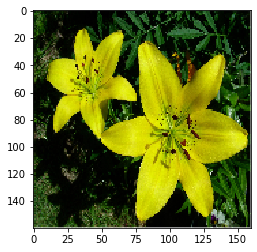

In [10]:
%matplotlib inline 

from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input
from tensorflow.keras.applications.imagenet_utils import decode_predictions
import matplotlib.pyplot as plt

base_model2 = tf.keras.applications.MobileNetV2(input_shape=IMG_SHAPE, weights='imagenet')
base_model2.summary()
img_path = '../../img/flower.jpg'
img = image.load_img(img_path, target_size=(160, 160))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)

preds = base_model2.predict(x)
print('Predicted:', decode_predictions(preds, top=3)[0])

plt.imshow(img)

In [26]:
feature_batch = base_model(image_batch)
print(feature_batch.shape)

(32, 5, 5, 1280)


### Feature extraction - base model 잠그기
* pre-trained model은 학습이 하지 않고 그대로 유지
* `base_model.trainable = False`

In [27]:
base_model.trainable = False
base_model.summary()

Model: "mobilenetv2_1.00_160"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_7 (InputLayer)            [(None, 160, 160, 3) 0                                            
__________________________________________________________________________________________________
Conv1_pad (ZeroPadding2D)       (None, 161, 161, 3)  0           input_7[0][0]                    
__________________________________________________________________________________________________
Conv1 (Conv2D)                  (None, 80, 80, 32)   864         Conv1_pad[0][0]                  
__________________________________________________________________________________________________
bn_Conv1 (BatchNormalization)   (None, 80, 80, 32)   128         Conv1[0][0]                      
_______________________________________________________________________________

block_4_expand_relu (ReLU)      (None, 20, 20, 192)  0           block_4_expand_BN[0][0]          
__________________________________________________________________________________________________
block_4_depthwise (DepthwiseCon (None, 20, 20, 192)  1728        block_4_expand_relu[0][0]        
__________________________________________________________________________________________________
block_4_depthwise_BN (BatchNorm (None, 20, 20, 192)  768         block_4_depthwise[0][0]          
__________________________________________________________________________________________________
block_4_depthwise_relu (ReLU)   (None, 20, 20, 192)  0           block_4_depthwise_BN[0][0]       
__________________________________________________________________________________________________
block_4_project (Conv2D)        (None, 20, 20, 32)   6144        block_4_depthwise_relu[0][0]     
__________________________________________________________________________________________________
block_4_pr

__________________________________________________________________________________________________
block_8_project (Conv2D)        (None, 10, 10, 64)   24576       block_8_depthwise_relu[0][0]     
__________________________________________________________________________________________________
block_8_project_BN (BatchNormal (None, 10, 10, 64)   256         block_8_project[0][0]            
__________________________________________________________________________________________________
block_8_add (Add)               (None, 10, 10, 64)   0           block_7_add[0][0]                
                                                                 block_8_project_BN[0][0]         
__________________________________________________________________________________________________
block_9_expand (Conv2D)         (None, 10, 10, 384)  24576       block_8_add[0][0]                
__________________________________________________________________________________________________
block_9_ex

__________________________________________________________________________________________________
block_13_expand_BN (BatchNormal (None, 10, 10, 576)  2304        block_13_expand[0][0]            
__________________________________________________________________________________________________
block_13_expand_relu (ReLU)     (None, 10, 10, 576)  0           block_13_expand_BN[0][0]         
__________________________________________________________________________________________________
block_13_pad (ZeroPadding2D)    (None, 11, 11, 576)  0           block_13_expand_relu[0][0]       
__________________________________________________________________________________________________
block_13_depthwise (DepthwiseCo (None, 5, 5, 576)    5184        block_13_pad[0][0]               
__________________________________________________________________________________________________
block_13_depthwise_BN (BatchNor (None, 5, 5, 576)    2304        block_13_depthwise[0][0]         
__________

In [28]:
global_average_layer = tf.keras.layers.GlobalAveragePooling2D()
feature_batch_average = global_average_layer(feature_batch)
print(feature_batch_average.shape)

(32, 1280)


In [29]:
prediction_layer = tf.keras.layers.Dense(1)
prediction_batch = prediction_layer(feature_batch_average)
print(prediction_batch.shape)

(32, 1)


### 새로운 모델 생성

In [30]:
model = tf.keras.Sequential([
  base_model,
  global_average_layer,
  prediction_layer
])

In [31]:
base_learning_rate = 0.0001
model.compile(optimizer=tf.keras.optimizers.RMSprop(lr=base_learning_rate),
              loss='binary_crossentropy',
              metrics=['accuracy'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
mobilenetv2_1.00_160 (Model) (None, 5, 5, 1280)        2257984   
_________________________________________________________________
global_average_pooling2d_5 ( (None, 1280)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 1281      
Total params: 2,259,265
Trainable params: 1,281
Non-trainable params: 2,257,984
_________________________________________________________________


In [32]:
len(model.trainable_variables)

2

In [33]:
num_train, num_val, num_test = (
  metadata.splits['train'].num_examples*weight/10
  for weight in SPLIT_WEIGHTS
)

### 새로운 모델의 학습전 정확도
* 매우 낮음

In [35]:
initial_epochs = 10
steps_per_epoch = round(num_train)//BATCH_SIZE
validation_steps = 20

loss0,accuracy0 = model.evaluate(validation_batches, steps = validation_steps)
print("initial loss: {:.2f}".format(loss0))
print("initial accuracy: {:.2f}".format(accuracy0))

20/20 [==============================] - ETA: 3s - loss: 4.7703 - accuracy: 0.50 - ETA: 2s - loss: 5.7029 - accuracy: 0.43 - ETA: 1s - loss: 6.0554 - accuracy: 0.37 - ETA: 1s - loss: 6.0398 - accuracy: 0.36 - ETA: 1s - loss: 6.5597 - accuracy: 0.34 - ETA: 1s - loss: 6.4758 - accuracy: 0.35 - ETA: 0s - loss: 6.6936 - accuracy: 0.34 - ETA: 0s - loss: 6.5487 - accuracy: 0.37 - ETA: 0s - loss: 6.5054 - accuracy: 0.37 - ETA: 0s - loss: 6.5383 - accuracy: 0.36 - ETA: 0s - loss: 6.4924 - accuracy: 0.38 - ETA: 0s - loss: 6.3386 - accuracy: 0.39 - ETA: 0s - loss: 6.3294 - accuracy: 0.39 - ETA: 0s - loss: 6.3922 - accuracy: 0.39 - ETA: 0s - loss: 6.3286 - accuracy: 0.38 - ETA: 0s - loss: 6.3325 - accuracy: 0.37 - ETA: 0s - loss: 6.3372 - accuracy: 0.37 - ETA: 0s - loss: 6.3881 - accuracy: 0.37 - ETA: 0s - loss: 6.4288 - accuracy: 0.36 - 1s 59ms/step - loss: 6.4338 - accuracy: 0.3672
initial loss: 6.43
initial accuracy: 0.37


In [36]:
print("initial loss: {:.2f}".format(loss0))
print("initial accuracy: {:.2f}".format(accuracy0))

initial loss: 6.43
initial accuracy: 0.37


### 학습 시작

In [37]:
history = model.fit(train_batches,
                    epochs=initial_epochs,
                    validation_data=validation_batches)

Epoch 1/10


    167/Unknown - 4s 4s/step - loss: 5.7975 - accuracy: 0.37 - 4s 2s/step - loss: 5.6927 - accuracy: 0.40 - 4s 1s/step - loss: 5.5896 - accuracy: 0.39 - 4s 957ms/step - loss: 5.1618 - accuracy: 0.429 - 4s 785ms/step - loss: 5.3186 - accuracy: 0.450 - 4s 670ms/step - loss: 4.8512 - accuracy: 0.463 - 4s 588ms/step - loss: 4.8649 - accuracy: 0.446 - 4s 527ms/step - loss: 4.9788 - accuracy: 0.433 - 4s 479ms/step - loss: 4.9887 - accuracy: 0.441 - 4s 441ms/step - loss: 4.9263 - accuracy: 0.453 - 5s 409ms/step - loss: 4.9619 - accuracy: 0.443 - 5s 383ms/step - loss: 4.8590 - accuracy: 0.453 - 5s 362ms/step - loss: 4.7669 - accuracy: 0.447 - 5s 343ms/step - loss: 4.8020 - accuracy: 0.450 - 5s 327ms/step - loss: 4.7076 - accuracy: 0.456 - 5s 313ms/step - loss: 4.6249 - accuracy: 0.459 - 5s 300ms/step - loss: 4.6042 - accuracy: 0.461 - 5s 289ms/step - loss: 4.6533 - accuracy: 0.456 - 5s 279ms/step - loss: 4.6364 - accuracy: 0.462 - 5s 270ms/step - loss: 4.6115 - accuracy: 0.468 - 5s 262ms/step 

    334/Unknown - 20s 120ms/step - loss: 3.9443 - accuracy: 0.53 - 20s 120ms/step - loss: 3.9513 - accuracy: 0.53 - 20s 120ms/step - loss: 3.9470 - accuracy: 0.53 - 20s 120ms/step - loss: 3.9369 - accuracy: 0.53 - 21s 120ms/step - loss: 3.9348 - accuracy: 0.53 - 21s 119ms/step - loss: 3.9233 - accuracy: 0.53 - 21s 119ms/step - loss: 3.9275 - accuracy: 0.53 - 21s 119ms/step - loss: 3.9269 - accuracy: 0.53 - 21s 119ms/step - loss: 3.9265 - accuracy: 0.53 - 21s 119ms/step - loss: 3.9301 - accuracy: 0.53 - 21s 119ms/step - loss: 3.9245 - accuracy: 0.53 - 21s 119ms/step - loss: 3.9183 - accuracy: 0.53 - 21s 119ms/step - loss: 3.9072 - accuracy: 0.54 - 21s 119ms/step - loss: 3.8998 - accuracy: 0.54 - 22s 119ms/step - loss: 3.8889 - accuracy: 0.54 - 22s 119ms/step - loss: 3.8825 - accuracy: 0.54 - 22s 118ms/step - loss: 3.8711 - accuracy: 0.54 - 22s 118ms/step - loss: 3.8707 - accuracy: 0.54 - 22s 118ms/step - loss: 3.8674 - accuracy: 0.54 - 22s 118ms/step - loss: 3.8587 - accuracy: 0.54 - 22

    501/Unknown - 37s 111ms/step - loss: 3.2431 - accuracy: 0.60 - 37s 111ms/step - loss: 3.2399 - accuracy: 0.60 - 37s 111ms/step - loss: 3.2342 - accuracy: 0.60 - 37s 111ms/step - loss: 3.2323 - accuracy: 0.60 - 38s 111ms/step - loss: 3.2272 - accuracy: 0.60 - 38s 111ms/step - loss: 3.2246 - accuracy: 0.60 - 38s 111ms/step - loss: 3.2213 - accuracy: 0.60 - 38s 111ms/step - loss: 3.2198 - accuracy: 0.60 - 38s 111ms/step - loss: 3.2239 - accuracy: 0.60 - 38s 111ms/step - loss: 3.2210 - accuracy: 0.60 - 38s 111ms/step - loss: 3.2181 - accuracy: 0.60 - 38s 110ms/step - loss: 3.2165 - accuracy: 0.60 - 38s 110ms/step - loss: 3.2125 - accuracy: 0.60 - 38s 110ms/step - loss: 3.2069 - accuracy: 0.60 - 39s 110ms/step - loss: 3.2012 - accuracy: 0.60 - 39s 110ms/step - loss: 3.2007 - accuracy: 0.60 - 39s 110ms/step - loss: 3.2014 - accuracy: 0.60 - 39s 110ms/step - loss: 3.1949 - accuracy: 0.60 - 39s 110ms/step - loss: 3.1941 - accuracy: 0.60 - 39s 110ms/step - loss: 3.1901 - accuracy: 0.60 - 39

582/582 [==============================] 2.7664 - accuracy: 0.65 - 54s 108ms/step - loss: 2.7639 - accuracy: 0.65 - 54s 108ms/step - loss: 2.7590 - accuracy: 0.65 - 54s 108ms/step - loss: 2.7590 - accuracy: 0.65 - 54s 108ms/step - loss: 2.7587 - accuracy: 0.65 - 55s 108ms/step - loss: 2.7565 - accuracy: 0.65 - 55s 107ms/step - loss: 2.7545 - accuracy: 0.65 - 55s 107ms/step - loss: 2.7517 - accuracy: 0.65 - 55s 107ms/step - loss: 2.7486 - accuracy: 0.65 - 55s 107ms/step - loss: 2.7478 - accuracy: 0.65 - 55s 107ms/step - loss: 2.7446 - accuracy: 0.65 - 55s 107ms/step - loss: 2.7407 - accuracy: 0.65 - 55s 107ms/step - loss: 2.7379 - accuracy: 0.65 - 55s 107ms/step - loss: 2.7376 - accuracy: 0.65 - 55s 107ms/step - loss: 2.7347 - accuracy: 0.65 - 56s 107ms/step - loss: 2.7319 - accuracy: 0.65 - 56s 107ms/step - loss: 2.7296 - accuracy: 0.65 - 56s 107ms/step - loss: 2.7282 - accuracy: 0.65 - 56s 107ms/step - loss: 2.7272 - accuracy: 0.65 - 56s 107ms/step - loss: 2.7235 - accuracy: 0.65 - 56

582/582 [==============================] ETA: 1:35 - loss: 1.1318 - accuracy: 0.84 - ETA: 50s - loss: 0.8457 - accuracy: 0.8906 - ETA: 35s - loss: 0.8596 - accuracy: 0.854 - ETA: 27s - loss: 0.8870 - accuracy: 0.875 - ETA: 23s - loss: 0.9130 - accuracy: 0.881 - ETA: 20s - loss: 0.9401 - accuracy: 0.875 - ETA: 18s - loss: 0.9055 - accuracy: 0.870 - ETA: 16s - loss: 0.8095 - accuracy: 0.882 - ETA: 15s - loss: 0.7365 - accuracy: 0.892 - ETA: 14s - loss: 0.7679 - accuracy: 0.893 - ETA: 13s - loss: 0.7643 - accuracy: 0.886 - ETA: 12s - loss: 0.7932 - accuracy: 0.882 - ETA: 11s - loss: 0.7882 - accuracy: 0.875 - ETA: 11s - loss: 0.8128 - accuracy: 0.872 - ETA: 10s - loss: 0.8692 - accuracy: 0.866 - ETA: 10s - loss: 0.8838 - accuracy: 0.867 - ETA: 9s - loss: 0.8505 - accuracy: 0.867 - ETA: 9s - loss: 0.8115 - accuracy: 0.87 - ETA: 8s - loss: 0.7758 - accuracy: 0.87 - ETA: 8s - loss: 0.8179 - accuracy: 0.86 - ETA: 8s - loss: 0.8063 - accuracy: 0.87 - ETA: 7s - loss: 0.7774 - accuracy: 0.87 - E

582/582 [==============================] ETA: 1:35 - loss: 0.1023 - accuracy: 0.93 - ETA: 50s - loss: 0.6273 - accuracy: 0.8750 - ETA: 35s - loss: 0.4751 - accuracy: 0.895 - ETA: 28s - loss: 0.5078 - accuracy: 0.898 - ETA: 23s - loss: 0.6012 - accuracy: 0.906 - ETA: 20s - loss: 0.6650 - accuracy: 0.911 - ETA: 18s - loss: 0.5927 - accuracy: 0.915 - ETA: 16s - loss: 0.5875 - accuracy: 0.918 - ETA: 15s - loss: 0.6536 - accuracy: 0.906 - ETA: 14s - loss: 0.5920 - accuracy: 0.915 - ETA: 13s - loss: 0.5452 - accuracy: 0.920 - ETA: 12s - loss: 0.5063 - accuracy: 0.919 - ETA: 11s - loss: 0.5104 - accuracy: 0.920 - ETA: 11s - loss: 0.5168 - accuracy: 0.921 - ETA: 10s - loss: 0.4915 - accuracy: 0.920 - ETA: 10s - loss: 0.5280 - accuracy: 0.919 - ETA: 9s - loss: 0.4983 - accuracy: 0.924 - ETA: 9s - loss: 0.5012 - accuracy: 0.92 - ETA: 8s - loss: 0.4833 - accuracy: 0.92 - ETA: 8s - loss: 0.5131 - accuracy: 0.92 - ETA: 8s - loss: 0.5468 - accuracy: 0.92 - ETA: 7s - loss: 0.5270 - accuracy: 0.92 - E

582/582 [==============================] ETA: 1:35 - loss: 0.0095 - accuracy: 1.00 - ETA: 50s - loss: 0.1031 - accuracy: 0.9375 - ETA: 35s - loss: 0.2472 - accuracy: 0.937 - ETA: 27s - loss: 0.2090 - accuracy: 0.937 - ETA: 23s - loss: 0.1794 - accuracy: 0.943 - ETA: 20s - loss: 0.1676 - accuracy: 0.942 - ETA: 18s - loss: 0.2285 - accuracy: 0.933 - ETA: 16s - loss: 0.2689 - accuracy: 0.929 - ETA: 15s - loss: 0.2530 - accuracy: 0.934 - ETA: 14s - loss: 0.2789 - accuracy: 0.937 - ETA: 13s - loss: 0.3469 - accuracy: 0.934 - ETA: 12s - loss: 0.4038 - accuracy: 0.932 - ETA: 11s - loss: 0.3777 - accuracy: 0.935 - ETA: 11s - loss: 0.3888 - accuracy: 0.937 - ETA: 10s - loss: 0.4278 - accuracy: 0.937 - ETA: 10s - loss: 0.4395 - accuracy: 0.935 - ETA: 9s - loss: 0.4428 - accuracy: 0.937 - ETA: 9s - loss: 0.4468 - accuracy: 0.93 - ETA: 8s - loss: 0.4544 - accuracy: 0.93 - ETA: 8s - loss: 0.4799 - accuracy: 0.93 - ETA: 8s - loss: 0.5052 - accuracy: 0.93 - ETA: 7s - loss: 0.5319 - accuracy: 0.93 - E

582/582 [==============================] ETA: 1:39 - loss: 0.0303 - accuracy: 0.96 - ETA: 52s - loss: 0.5160 - accuracy: 0.9375 - ETA: 36s - loss: 0.3508 - accuracy: 0.958 - ETA: 28s - loss: 0.4086 - accuracy: 0.945 - ETA: 24s - loss: 0.3283 - accuracy: 0.956 - ETA: 20s - loss: 0.3643 - accuracy: 0.953 - ETA: 18s - loss: 0.3985 - accuracy: 0.942 - ETA: 16s - loss: 0.4190 - accuracy: 0.941 - ETA: 15s - loss: 0.3756 - accuracy: 0.947 - ETA: 14s - loss: 0.3935 - accuracy: 0.946 - ETA: 13s - loss: 0.3702 - accuracy: 0.943 - ETA: 12s - loss: 0.3908 - accuracy: 0.934 - ETA: 11s - loss: 0.3693 - accuracy: 0.935 - ETA: 11s - loss: 0.3782 - accuracy: 0.937 - ETA: 10s - loss: 0.3615 - accuracy: 0.939 - ETA: 10s - loss: 0.3469 - accuracy: 0.939 - ETA: 9s - loss: 0.3851 - accuracy: 0.937 - ETA: 9s - loss: 0.4298 - accuracy: 0.93 - ETA: 9s - loss: 0.4373 - accuracy: 0.93 - ETA: 8s - loss: 0.4170 - accuracy: 0.93 - ETA: 8s - loss: 0.4481 - accuracy: 0.93 - ETA: 8s - loss: 0.4735 - accuracy: 0.93 - E

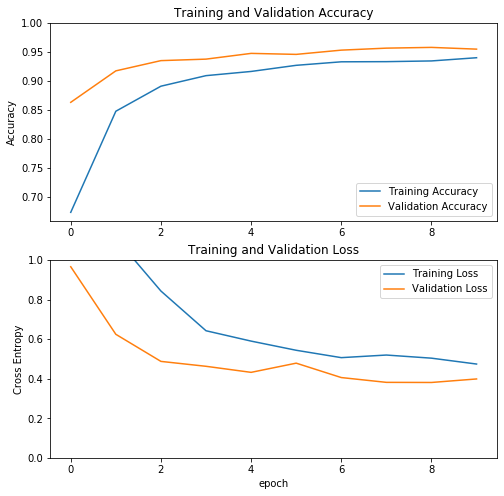

In [38]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.ylabel('Accuracy')
plt.ylim([min(plt.ylim()),1])
plt.title('Training and Validation Accuracy')

plt.subplot(2, 1, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.ylabel('Cross Entropy')
plt.ylim([0,1.0])
plt.title('Training and Validation Loss')
plt.xlabel('epoch')
plt.show()



### 새 모델의 학습 후 정확도
* 매우 높음

In [39]:
loss_after,accuracy_after = model.evaluate(validation_batches, steps = validation_steps)


20/20 [==============================] - ETA: 3s - loss: 0.0092 - accuracy: 1.00 - ETA: 2s - loss: 0.0769 - accuracy: 0.98 - ETA: 1s - loss: 0.0544 - accuracy: 0.98 - ETA: 1s - loss: 0.1644 - accuracy: 0.98 - ETA: 1s - loss: 0.1431 - accuracy: 0.98 - ETA: 1s - loss: 0.2237 - accuracy: 0.97 - ETA: 0s - loss: 0.2017 - accuracy: 0.97 - ETA: 0s - loss: 0.3007 - accuracy: 0.96 - ETA: 0s - loss: 0.2699 - accuracy: 0.96 - ETA: 0s - loss: 0.2453 - accuracy: 0.96 - ETA: 0s - loss: 0.2680 - accuracy: 0.96 - ETA: 0s - loss: 0.2483 - accuracy: 0.96 - ETA: 0s - loss: 0.3033 - accuracy: 0.96 - ETA: 0s - loss: 0.3161 - accuracy: 0.96 - ETA: 0s - loss: 0.3047 - accuracy: 0.96 - ETA: 0s - loss: 0.3182 - accuracy: 0.96 - ETA: 0s - loss: 0.3337 - accuracy: 0.96 - ETA: 0s - loss: 0.3202 - accuracy: 0.96 - ETA: 0s - loss: 0.3287 - accuracy: 0.96 - 1s 60ms/step - loss: 0.3608 - accuracy: 0.9594
initial loss: 0.36
initial accuracy: 0.96


In [41]:
print("transfer-trained loss: {:.2f}".format(loss_after))
print("trainsfer-trained accuracy: {:.2f}".format(accuracy_after))

transfer-trained loss: 0.36
trainsfer-trained accuracy: 0.96


### 개, 고양이 예측 실험

preds_dog:[[3.0449831]], preds_cat:[[-3.0378022]]


Text(0.5, 1.0, 'dog')

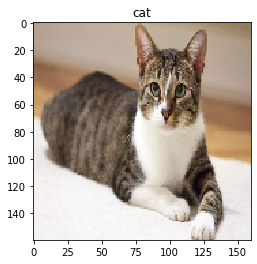

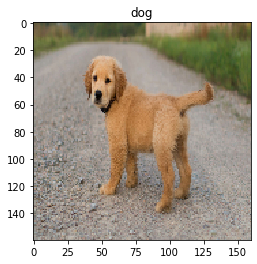

In [50]:
%matplotlib inline 

import tensorflow as tf
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt

cat_path = '../../img/cat.jpg'
dog_path = '../../img/dog.jpg'

img_cat = image.load_img(cat_path, target_size=(160, 160))
x_cat = image.img_to_array(img_cat)
x_cat = np.expand_dims(x_cat, axis=0)
x_cat = preprocess_input(x_cat)


img_dog = image.load_img(dog_path, target_size=(160, 160))
x_dog = image.img_to_array(img_dog)
x_dog = np.expand_dims(x_dog, axis=0)
x_dog = preprocess_input(x_dog)

preds_dog = model.predict(x_dog)
preds_cat = model.predict(x_cat)
print(f"preds_dog:{preds_dog}, preds_cat:{preds_cat}")
cat_title =  'dog' if tf.sigmoid(preds_cat)> 0.5 else 'cat'
dog_title =  'dog' if tf.sigmoid(preds_dog)> 0.5 else 'cat'

plt.figure()
plt.imshow(img_cat)
plt.title(cat_title)
plt.figure()
plt.imshow(img_dog)
plt.title(dog_title)

### File tuning
* 미세 조정을 위한 transfer-learning
* 기존 모델도 학습 필요
    * `base_model.trainable = True`
* 특정 레이어에서 부터 학습 시작, 이전은 잠그기
    * layer 100
    * layer.trainable = False

In [58]:
base_model.trainable = True
# Let's take a look to see how many layers are in the base model
print("Number of layers in the base model: ", len(base_model.layers))

# Fine tune from this layer onwards
fine_tune_at = 100

# Freeze all the layers before the `fine_tune_at` layer
for layer in base_model.layers[:fine_tune_at]:
  layer.trainable =  False

Number of layers in the base model:  155


In [59]:
model.compile(loss='binary_crossentropy',
              optimizer = tf.keras.optimizers.RMSprop(lr=base_learning_rate/10),
              metrics=['accuracy'])

In [60]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
mobilenetv2_1.00_160 (Model) (None, 5, 5, 1280)        2257984   
_________________________________________________________________
global_average_pooling2d_5 ( (None, 1280)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 1281      
Total params: 2,259,265
Trainable params: 1,863,873
Non-trainable params: 395,392
_________________________________________________________________


In [61]:
len(model.trainable_variables)

58

### Fine tune 학습 시작

In [62]:
fine_tune_epochs = 10
total_epochs =  initial_epochs + fine_tune_epochs

history_fine = model.fit(train_batches,
                         epochs=total_epochs,
                         initial_epoch = initial_epochs,
                         validation_data=validation_batches)

Epoch 11/20


    168/Unknown - 5s 5s/step - loss: 0.0789 - accuracy: 0.96 - 6s 3s/step - loss: 0.3043 - accuracy: 0.95 - 6s 2s/step - loss: 0.4337 - accuracy: 0.91 - 6s 1s/step - loss: 0.3307 - accuracy: 0.93 - 6s 1s/step - loss: 0.2655 - accuracy: 0.95 - 6s 1s/step - loss: 0.3016 - accuracy: 0.95 - 6s 877ms/step - loss: 0.2743 - accuracy: 0.950 - 6s 782ms/step - loss: 0.2433 - accuracy: 0.953 - 6s 708ms/step - loss: 0.2709 - accuracy: 0.954 - 6s 649ms/step - loss: 0.2447 - accuracy: 0.959 - 7s 601ms/step - loss: 0.2666 - accuracy: 0.960 - 7s 561ms/step - loss: 0.2473 - accuracy: 0.963 - 7s 527ms/step - loss: 0.2303 - accuracy: 0.963 - 7s 498ms/step - loss: 0.2203 - accuracy: 0.962 - 7s 473ms/step - loss: 0.2128 - accuracy: 0.962 - 7s 451ms/step - loss: 0.2367 - accuracy: 0.959 - 7s 432ms/step - loss: 0.2551 - accuracy: 0.955 - 7s 415ms/step - loss: 0.2493 - accuracy: 0.953 - 8s 399ms/step - loss: 0.2367 - accuracy: 0.955 - 8s 385ms/step - loss: 0.2519 - accuracy: 0.954 - 8s 372ms/step - loss: 0.26

    335/Unknown - 26s 154ms/step - loss: 0.3946 - accuracy: 0.94 - 26s 154ms/step - loss: 0.3964 - accuracy: 0.94 - 26s 154ms/step - loss: 0.3969 - accuracy: 0.94 - 26s 154ms/step - loss: 0.3953 - accuracy: 0.94 - 27s 154ms/step - loss: 0.3959 - accuracy: 0.94 - 27s 153ms/step - loss: 0.3977 - accuracy: 0.94 - 27s 153ms/step - loss: 0.4012 - accuracy: 0.94 - 27s 153ms/step - loss: 0.4019 - accuracy: 0.94 - 27s 153ms/step - loss: 0.4135 - accuracy: 0.94 - 27s 153ms/step - loss: 0.4223 - accuracy: 0.94 - 27s 153ms/step - loss: 0.4227 - accuracy: 0.94 - 27s 152ms/step - loss: 0.4206 - accuracy: 0.94 - 28s 152ms/step - loss: 0.4184 - accuracy: 0.94 - 28s 152ms/step - loss: 0.4165 - accuracy: 0.94 - 28s 152ms/step - loss: 0.4144 - accuracy: 0.94 - 28s 152ms/step - loss: 0.4126 - accuracy: 0.94 - 28s 152ms/step - loss: 0.4106 - accuracy: 0.94 - 28s 151ms/step - loss: 0.4089 - accuracy: 0.94 - 28s 151ms/step - loss: 0.4068 - accuracy: 0.94 - 28s 151ms/step - loss: 0.4049 - accuracy: 0.94 - 29

    502/Unknown - 47s 139ms/step - loss: 0.4212 - accuracy: 0.94 - 47s 139ms/step - loss: 0.4201 - accuracy: 0.94 - 47s 139ms/step - loss: 0.4203 - accuracy: 0.94 - 47s 139ms/step - loss: 0.4192 - accuracy: 0.94 - 47s 139ms/step - loss: 0.4183 - accuracy: 0.94 - 47s 139ms/step - loss: 0.4187 - accuracy: 0.94 - 48s 139ms/step - loss: 0.4189 - accuracy: 0.94 - 48s 139ms/step - loss: 0.4179 - accuracy: 0.94 - 48s 139ms/step - loss: 0.4169 - accuracy: 0.94 - 48s 139ms/step - loss: 0.4160 - accuracy: 0.94 - 48s 139ms/step - loss: 0.4148 - accuracy: 0.94 - 48s 139ms/step - loss: 0.4167 - accuracy: 0.94 - 48s 139ms/step - loss: 0.4156 - accuracy: 0.94 - 48s 139ms/step - loss: 0.4158 - accuracy: 0.94 - 49s 139ms/step - loss: 0.4147 - accuracy: 0.94 - 49s 139ms/step - loss: 0.4150 - accuracy: 0.94 - 49s 139ms/step - loss: 0.4152 - accuracy: 0.94 - 49s 138ms/step - loss: 0.4141 - accuracy: 0.94 - 49s 138ms/step - loss: 0.4158 - accuracy: 0.94 - 49s 138ms/step - loss: 0.4160 - accuracy: 0.94 - 49

582/582 [==============================] 0.3956 - accuracy: 0.94 - 68s 134ms/step - loss: 0.3948 - accuracy: 0.94 - 68s 134ms/step - loss: 0.3941 - accuracy: 0.94 - 68s 134ms/step - loss: 0.3943 - accuracy: 0.94 - 68s 134ms/step - loss: 0.3937 - accuracy: 0.94 - 68s 134ms/step - loss: 0.3932 - accuracy: 0.94 - 68s 134ms/step - loss: 0.3926 - accuracy: 0.94 - 68s 134ms/step - loss: 0.3928 - accuracy: 0.94 - 68s 134ms/step - loss: 0.3931 - accuracy: 0.94 - 69s 134ms/step - loss: 0.3936 - accuracy: 0.94 - 69s 134ms/step - loss: 0.3931 - accuracy: 0.94 - 69s 134ms/step - loss: 0.3926 - accuracy: 0.94 - 69s 134ms/step - loss: 0.3928 - accuracy: 0.94 - 69s 134ms/step - loss: 0.3940 - accuracy: 0.94 - 69s 134ms/step - loss: 0.3936 - accuracy: 0.94 - 69s 134ms/step - loss: 0.3929 - accuracy: 0.94 - 69s 134ms/step - loss: 0.3952 - accuracy: 0.94 - 70s 134ms/step - loss: 0.3946 - accuracy: 0.94 - 70s 134ms/step - loss: 0.3940 - accuracy: 0.94 - 70s 134ms/step - loss: 0.3953 - accuracy: 0.94 - 70

582/582 [==============================] ETA: 1:48 - loss: 0.0000e+00 - accuracy: 1.00 - ETA: 57s - loss: 0.2410 - accuracy: 0.9844     - ETA: 41s - loss: 0.3214 - accuracy: 0.979 - ETA: 32s - loss: 0.2441 - accuracy: 0.984 - ETA: 27s - loss: 0.3945 - accuracy: 0.968 - ETA: 24s - loss: 0.4248 - accuracy: 0.958 - ETA: 21s - loss: 0.3641 - accuracy: 0.964 - ETA: 19s - loss: 0.3785 - accuracy: 0.964 - ETA: 18s - loss: 0.3369 - accuracy: 0.968 - ETA: 17s - loss: 0.3629 - accuracy: 0.962 - ETA: 16s - loss: 0.3753 - accuracy: 0.963 - ETA: 15s - loss: 0.3844 - accuracy: 0.963 - ETA: 14s - loss: 0.3562 - accuracy: 0.966 - ETA: 13s - loss: 0.3314 - accuracy: 0.968 - ETA: 13s - loss: 0.3117 - accuracy: 0.968 - ETA: 12s - loss: 0.2985 - accuracy: 0.966 - ETA: 12s - loss: 0.2810 - accuracy: 0.968 - ETA: 11s - loss: 0.2663 - accuracy: 0.970 - ETA: 11s - loss: 0.2540 - accuracy: 0.972 - ETA: 10s - loss: 0.2658 - accuracy: 0.971 - ETA: 10s - loss: 0.2548 - accuracy: 0.971 - ETA: 9s - loss: 0.2432 - a

582/582 [==============================] ETA: 1:41 - loss: 0.0796 - accuracy: 0.96 - ETA: 54s - loss: 0.5262 - accuracy: 0.9531 - ETA: 38s - loss: 0.3601 - accuracy: 0.968 - ETA: 30s - loss: 0.2701 - accuracy: 0.976 - ETA: 25s - loss: 0.3119 - accuracy: 0.975 - ETA: 22s - loss: 0.2690 - accuracy: 0.974 - ETA: 20s - loss: 0.2441 - accuracy: 0.968 - ETA: 18s - loss: 0.2181 - accuracy: 0.968 - ETA: 17s - loss: 0.2474 - accuracy: 0.968 - ETA: 15s - loss: 0.2747 - accuracy: 0.965 - ETA: 14s - loss: 0.2497 - accuracy: 0.968 - ETA: 14s - loss: 0.2289 - accuracy: 0.971 - ETA: 13s - loss: 0.2131 - accuracy: 0.973 - ETA: 12s - loss: 0.2007 - accuracy: 0.973 - ETA: 12s - loss: 0.1890 - accuracy: 0.975 - ETA: 11s - loss: 0.1780 - accuracy: 0.976 - ETA: 11s - loss: 0.1959 - accuracy: 0.976 - ETA: 10s - loss: 0.1863 - accuracy: 0.977 - ETA: 10s - loss: 0.1764 - accuracy: 0.978 - ETA: 10s - loss: 0.1676 - accuracy: 0.979 - ETA: 9s - loss: 0.1596 - accuracy: 0.980 - ETA: 9s - loss: 0.1525 - accuracy: 

582/582 [==============================] ETA: 1:43 - loss: 0.4880 - accuracy: 0.96 - ETA: 55s - loss: 0.2440 - accuracy: 0.9844 - ETA: 39s - loss: 0.1627 - accuracy: 0.989 - ETA: 31s - loss: 0.1235 - accuracy: 0.992 - ETA: 26s - loss: 0.0988 - accuracy: 0.993 - ETA: 22s - loss: 0.0826 - accuracy: 0.994 - ETA: 20s - loss: 0.0749 - accuracy: 0.991 - ETA: 18s - loss: 0.0655 - accuracy: 0.992 - ETA: 17s - loss: 0.0583 - accuracy: 0.993 - ETA: 16s - loss: 0.0530 - accuracy: 0.993 - ETA: 15s - loss: 0.0482 - accuracy: 0.994 - ETA: 14s - loss: 0.0443 - accuracy: 0.994 - ETA: 13s - loss: 0.0409 - accuracy: 0.995 - ETA: 12s - loss: 0.0383 - accuracy: 0.995 - ETA: 12s - loss: 0.0358 - accuracy: 0.995 - ETA: 11s - loss: 0.0335 - accuracy: 0.996 - ETA: 11s - loss: 0.0316 - accuracy: 0.996 - ETA: 10s - loss: 0.0298 - accuracy: 0.996 - ETA: 10s - loss: 0.0288 - accuracy: 0.996 - ETA: 10s - loss: 0.0531 - accuracy: 0.995 - ETA: 9s - loss: 0.0506 - accuracy: 0.995 - ETA: 9s - loss: 0.0484 - accuracy: 

582/582 [==============================] ETA: 1:41 - loss: 0.0000e+00 - accuracy: 1.00 - ETA: 54s - loss: 0.0000e+00 - accuracy: 1.0000 - ETA: 38s - loss: 0.0000e+00 - accuracy: 1.000 - ETA: 30s - loss: 0.0000e+00 - accuracy: 1.000 - ETA: 26s - loss: 0.0000e+00 - accuracy: 1.000 - ETA: 22s - loss: 0.0000e+00 - accuracy: 1.000 - ETA: 20s - loss: 0.0152 - accuracy: 0.9955    - ETA: 18s - loss: 0.0133 - accuracy: 0.996 - ETA: 17s - loss: 0.0755 - accuracy: 0.989 - ETA: 16s - loss: 0.0680 - accuracy: 0.990 - ETA: 15s - loss: 0.0618 - accuracy: 0.991 - ETA: 14s - loss: 0.0580 - accuracy: 0.992 - ETA: 13s - loss: 0.0907 - accuracy: 0.990 - ETA: 12s - loss: 0.0842 - accuracy: 0.991 - ETA: 12s - loss: 0.0848 - accuracy: 0.987 - ETA: 11s - loss: 0.0795 - accuracy: 0.988 - ETA: 11s - loss: 0.0748 - accuracy: 0.989 - ETA: 10s - loss: 0.0706 - accuracy: 0.989 - ETA: 10s - loss: 0.0671 - accuracy: 0.990 - ETA: 10s - loss: 0.0643 - accuracy: 0.990 - ETA: 9s - loss: 0.0612 - accuracy: 0.991 - ETA: 9s

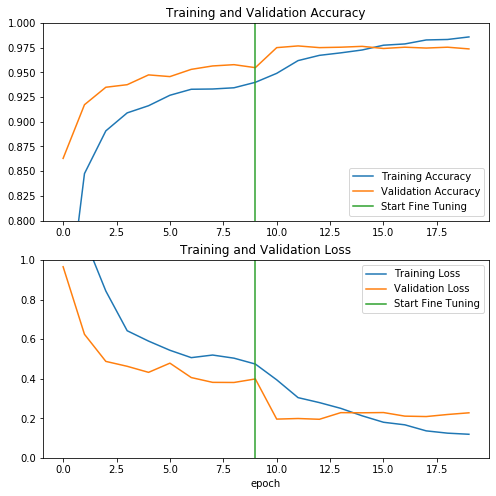

In [63]:
acc += history_fine.history['accuracy']
val_acc += history_fine.history['val_accuracy']

loss += history_fine.history['loss']
val_loss += history_fine.history['val_loss']

plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.ylim([0.8, 1])
plt.plot([initial_epochs-1,initial_epochs-1],
          plt.ylim(), label='Start Fine Tuning')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(2, 1, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.ylim([0, 1.0])
plt.plot([initial_epochs-1,initial_epochs-1],
         plt.ylim(), label='Start Fine Tuning')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.xlabel('epoch')
plt.show()

In [64]:
loss_after2,accuracy_after2 = model.evaluate(validation_batches, steps = validation_steps)

20/20 [==============================] - ETA: 3s - loss: 0.0376 - accuracy: 0.96 - ETA: 2s - loss: 0.0678 - accuracy: 0.93 - ETA: 1s - loss: 0.0461 - accuracy: 0.95 - ETA: 1s - loss: 0.0412 - accuracy: 0.96 - ETA: 1s - loss: 0.0502 - accuracy: 0.95 - ETA: 1s - loss: 0.1271 - accuracy: 0.95 - ETA: 0s - loss: 0.1778 - accuracy: 0.95 - ETA: 0s - loss: 0.2791 - accuracy: 0.94 - ETA: 0s - loss: 0.2481 - accuracy: 0.95 - ETA: 0s - loss: 0.2233 - accuracy: 0.95 - ETA: 0s - loss: 0.2138 - accuracy: 0.95 - ETA: 0s - loss: 0.2001 - accuracy: 0.95 - ETA: 0s - loss: 0.1868 - accuracy: 0.95 - ETA: 0s - loss: 0.2079 - accuracy: 0.95 - ETA: 0s - loss: 0.1964 - accuracy: 0.96 - ETA: 0s - loss: 0.1858 - accuracy: 0.96 - ETA: 0s - loss: 0.2032 - accuracy: 0.96 - ETA: 0s - loss: 0.1919 - accuracy: 0.96 - ETA: 0s - loss: 0.1818 - accuracy: 0.96 - 1s 59ms/step - loss: 0.2209 - accuracy: 0.9656


In [65]:
print("fine tuned loss 2: {:.2f}".format(loss_after2))
print("fine tuned accuracy 2: {:.2f}".format(accuracy_after2))

fine tuned loss 2: 0.22
fine tuned accuracy 2: 0.97
